<a href="https://colab.research.google.com/github/datasigntist/mlnotebooks/blob/master/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Vishwanathan Raman



---


**Change History**


*   1-Jan-2018 -- Initial Creation
*   14-Aug-2019 -- Included detailed comments for each step


---

**Credits**


---

**Use Case Description**


This notebook focusses on the following topics using titanic dataset

*   Introduction to Pandas
*   Data handling with Pandas
*   Developing ML Models


---


**Other Learning Resources**

In [0]:
import pandas as pd

In [0]:
# Reading a csv file
trainDatadf = pd.read_csv('../datasets/titanic_train.csv')

In [0]:
type(trainDatadf)

pandas.core.frame.DataFrame

In [0]:
# Viewing the first few rows of the dataset
trainDatadf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Viewing the last few rows of the dataset
trainDatadf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
# Listing all the columns of the dataset
trainDatadf.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [0]:
# Listing all the columns and data types of the dataset
trainDatadf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# Check the return type of dtypes
type(trainDatadf.dtypes)

pandas.core.series.Series

In [0]:
# Python Pandas - Series. Series is a one-dimensional labeled array capable of holding data of any type 
#(integer, string, float, python objects, etc.).
trainDatadf.dtypes.index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# Python Pandas - Series. Series is a one-dimensional labeled array capable of holding data of any type 
#(integer, string, float, python objects, etc.).
trainDatadf.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('float64'), dtype('O'), dtype('O')], dtype=object)

In [0]:
# Converting the dtypes output as a dataframe
dataTypesdf = pd.DataFrame({'columnName' : trainDatadf.dtypes.index, 'dataType' : trainDatadf.dtypes.values})
dataTypesdf.head()

,columnName,dataType
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object


In [0]:
# Accessing data within the object
trainDatadf["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
# Accessing data within the object, listing the first 4 names
trainDatadf["Name"][0:4]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
Name: Name, dtype: object

In [0]:
# Accessing multiple attributes of the object, listing the first 5 names
trainDatadf[["Name","Sex"]].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [0]:
# Accessing multiple attributes of the object, listing the first 5 names
trainDatadf[["Name","Sex"]][0:5]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [0]:
# Get the summary statistics of the object
trainDatadf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# Get the total rowcount
len(trainDatadf)

891

In [0]:
# Get the shape of the dataset, 891 rows and 12 columns
trainDatadf.shape

(891, 12)

In [0]:
# Looping through the dataset and print passenger names
for loop in range(4):
    print('Passenger Name is',trainDatadf['Name'][loop])

Passenger Name is Braund, Mr. Owen Harris
Passenger Name is Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Passenger Name is Heikkinen, Miss. Laina
Passenger Name is Futrelle, Mrs. Jacques Heath (Lily May Peel)


In [0]:
# Looping through the dataset and print passenger names
for loop in range(4):
    print('Passenger Name is %s whose age is %d years old' %(trainDatadf['Name'][loop],trainDatadf['Age'][loop]))

Passenger Name is Braund, Mr. Owen Harris whose age is 22 years old
Passenger Name is Cumings, Mrs. John Bradley (Florence Briggs Thayer) whose age is 38 years old
Passenger Name is Heikkinen, Miss. Laina whose age is 26 years old
Passenger Name is Futrelle, Mrs. Jacques Heath (Lily May Peel) whose age is 35 years old


In [0]:
allPassengerNameslist = [passengerName for passengerName in trainDatadf['Name']]

In [0]:
type(allPassengerNameslist)

list

In [0]:
# Accessing elements within the list
allPassengerNameslist[0]

'Braund, Mr. Owen Harris'

In [0]:
# Accessing elements within the list
allPassengerNameslist[0:5]

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry']

In [0]:
# Getting the length of the list
len(allPassengerNameslist)

891

In [0]:
# Filtering the dataset, identifying passengers whose Age is null or missing
trainDatadf[trainDatadf["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [0]:
# Filtering the dataset, identifying passengers whose Age is null or missing and Sex is female
trainDatadf[(trainDatadf["Age"].isnull()) & (trainDatadf["Sex"] == "female")].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q


In [0]:
# Filtering the dataset, identifying passengers whose Age is null or missing, Sex is female and Cabin is also null
trainDatadf[(trainDatadf["Age"].isnull()) & (trainDatadf["Sex"] == "female") & (trainDatadf["Cabin"].isnull())].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q


In [0]:
# Lets find the number of male and females among passengers
trainDatadf.groupby("Sex").size().reset_index(name="counts")

,Sex,counts
0,female,314
1,male,577


In [0]:
# Lets do something about the missing values in Age, what will be the right strategy
trainDatadf.groupby("Sex")["Age"].mean().reset_index(name="counts")

,Sex,counts
0,female,27.915709
1,male,30.726645


In [0]:
# Is that a right strategy?, lets have a closer look at the dataset especially name
trainDatadf["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
# Lets have a closer look at the name
trainDatadf["Name"][0]

'Braund, Mr. Owen Harris'

In [0]:
# The name has a last name, title and last name
trainDatadf["Name"][0].split(",")

['Braund', ' Mr. Owen Harris']

In [0]:
# Lets split it one more time to get the Title and before that strip the leading characters
trainDatadf["Name"][0].split(",")[1].strip()

'Mr. Owen Harris'

In [0]:
trainDatadf["Name"][0].split(",")[1].strip().split(".")

['Mr', ' Owen Harris']

In [0]:
trainDatadf["Name"][0].split(",")[1].strip().split(".")[0]

'Mr'

In [0]:
# Lets apply this for the entire dataset
[trainDatadf["Name"][loop].split(",")[1].strip().split(".")[0] for loop in range(len(trainDatadf))][0:5]

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr']

In [0]:
# Lets apply the Title to a new column in the dataset
trainDatadf["Title"] = [trainDatadf["Name"][loop].split(",")[1].strip().split(".")[0] for loop in range(len(trainDatadf))]

In [0]:
trainDatadf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [0]:
# Lets explore the title
trainDatadf.groupby("Title").size()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

In [0]:
trainDatadf.groupby("Title").size().reset_index(name="counts")

,Title,counts
0,Capt,1
1,Col,2
2,Don,1
3,Dr,7
4,Jonkheer,1
5,Lady,1
6,Major,2
7,Master,40
8,Miss,182
9,Mlle,2


In [0]:
titleDatadf = trainDatadf.groupby("Title").size().reset_index(name="counts")

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

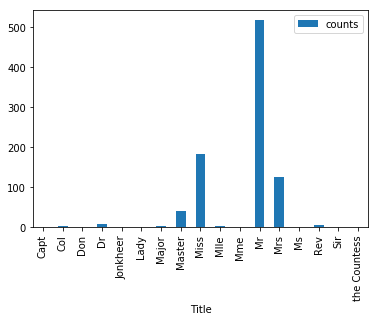

In [0]:
titleDatadf.plot.bar("Title","counts")

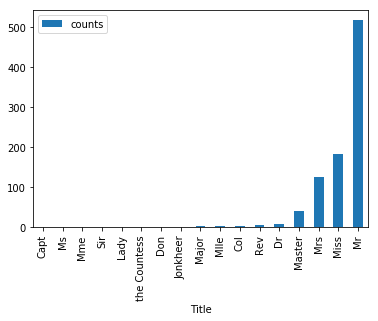

In [0]:
# Sorted by title distribution
titleDatadf.sort_values(by=['counts']).plot.bar("Title","counts")

In [0]:
titleDatadf = titleDatadf.sort_values(by=['counts'])

In [0]:
titleDatadf

,Title,counts
0,Capt,1
13,Ms,1
10,Mme,1
15,Sir,1
5,Lady,1
16,the Countess,1
2,Don,1
4,Jonkheer,1
6,Major,2
9,Mlle,2


In [0]:
# Group by Title and Age 
AgeByTitledf = trainDatadf.groupby("Title")["Age"].mean().reset_index(name = "AverageAge")

In [0]:
AgeByTitledf.head()

,Title,AverageAge
0,Capt,70.0
1,Col,58.0
2,Don,40.0
3,Dr,42.0
4,Jonkheer,38.0


In [0]:
# Add the average age to the dataset using the Title
trainDataExtdf = trainDatadf.merge(AgeByTitledf, on = "Title", how = "inner")

In [0]:
trainDataExtdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AverageAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,32.36809
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,32.36809
2,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,32.36809
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,32.36809
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr,32.36809


In [0]:
# Update the missing values in the dataset
for ind in trainDataExtdf[trainDataExtdf["Age"].isnull()].index:
    trainDataExtdf.loc[ind,"Age"] = trainDataExtdf.loc[ind,"AverageAge"]

In [0]:
trainDataExtdf["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [0]:
# Removing AverageAge as its utility is done
trainDataExtdf = trainDataExtdf.iloc[:,0:13]

In [0]:
# Checking Cabin
trainDataExtdf[trainDataExtdf["Cabin"].isnull()]["Cabin"].size

687

In [0]:
# Dropping Cabin as there are too many missing values
trainDataExtdf.drop(["Cabin"],axis=1,inplace=True)

In [0]:
trainDataExtdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr
1,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr
2,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,Q,Mr
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr
4,13,0,3,"Saundercock, Mr. William Henry",male,20.00000,0,0,A/5. 2151,8.0500,S,Mr


In [0]:
# Checking Embarked
trainDataExtdf.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [0]:
# Checking Embarked for empty values
trainDataExtdf[trainDataExtdf["Embarked"].isnull()].shape[0]

2

In [0]:
# Replace missing values of Embarked with "S"
for ind in trainDataExtdf[trainDataExtdf["Embarked"].isnull()].index:
    trainDataExtdf.loc[ind,"Embarked"] = "S"

In [0]:
# Checking Ticket for missing values
trainDataExtdf[trainDataExtdf["Ticket"].isnull()].shape[0]

0

In [0]:
titleDatadf

,Title,counts
0,Capt,1
13,Ms,1
10,Mme,1
15,Sir,1
5,Lady,1
16,the Countess,1
2,Don,1
4,Jonkheer,1
6,Major,2
9,Mlle,2


In [0]:
# Reducing the number of titles, translating Mme, Ms to Miss
for ind in trainDataExtdf[trainDataExtdf["Title"] == "Mme"].index:
    trainDataExtdf.loc[ind,"Title"] = "Miss"
for ind in trainDataExtdf[trainDataExtdf["Title"] == "Ms"].index:
    trainDataExtdf.loc[ind,"Title"] = "Miss"
for ind in trainDataExtdf[trainDataExtdf["Title"] == "Mlle"].index:
    trainDataExtdf.loc[ind,"Title"] = "Miss"

In [0]:
titleOtherSe = trainDataExtdf.groupby("Title").size()<8

In [0]:
titleOtherSe[titleOtherSe == True].index.values

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev',
       'Sir', 'the Countess'], dtype=object)

In [0]:
for title in titleOtherSe[titleOtherSe == True].index.values:
    trainDataExtdf.loc[trainDataExtdf["Title"] == title, "Title"] = "Others"

In [0]:
trainDataExtdf.groupby("Title").size()

Title
Master     40
Miss      186
Mr        517
Mrs       125
Others     23
dtype: int64

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [0]:
le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(trainDataExtdf["Sex"].unique())
le_Sex.classes_

array(['female', 'male'], dtype=object)

In [0]:
trainDataExtdf["le_Sex"] = le_Sex.transform(trainDataExtdf["Sex"])
#le_Sex.inverse_transform(trainDataExtdf["Sexle"])

In [0]:
trainDataExtdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,le_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,1
1,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,1
2,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,Q,Mr,1
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr,1
4,13,0,3,"Saundercock, Mr. William Henry",male,20.00000,0,0,A/5. 2151,8.0500,S,Mr,1


In [0]:
le_Title = preprocessing.LabelEncoder()
le_Title.fit(trainDataExtdf["Title"].unique())
le_Title.classes_

array(['Master', 'Miss', 'Mr', 'Mrs', 'Others'], dtype=object)

In [0]:
trainDataExtdf["le_Title"] = le_Title.transform(trainDataExtdf["Title"])

In [0]:
trainDataExtdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,le_Sex,le_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,1,2
1,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,1,2
2,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,Q,Mr,1,2
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr,1,2
4,13,0,3,"Saundercock, Mr. William Henry",male,20.00000,0,0,A/5. 2151,8.0500,S,Mr,1,2


In [0]:
le_Emb = preprocessing.LabelEncoder()
le_Emb.fit(trainDataExtdf["Embarked"].unique())
le_Emb.classes_

array(['C', 'Q', 'S'], dtype=object)

In [0]:
trainDataExtdf["le_Emb"] = le_Emb.transform(trainDataExtdf["Embarked"])

In [0]:
trainDataExtdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,le_Sex,le_Title,le_Emb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,1,2,2
1,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,1,2,2
2,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,Q,Mr,1,2,1
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr,1,2,2
4,13,0,3,"Saundercock, Mr. William Henry",male,20.00000,0,0,A/5. 2151,8.0500,S,Mr,1,2,2


In [0]:
trainDataExtdf[["PassengerId","Pclass","Age","SibSp","Parch","Fare","le_Sex","le_Title","le_Emb","Survived"]].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,le_Sex,le_Title,le_Emb,Survived
0,1,3,22.00000,1,0,7.2500,1,2,2,0
1,5,3,35.00000,0,0,8.0500,1,2,2,0
2,6,3,32.36809,0,0,8.4583,1,2,1,0
3,7,1,54.00000,0,0,51.8625,1,2,2,0
4,13,3,20.00000,0,0,8.0500,1,2,2,0


In [0]:
trainDataExtSubsetdf = trainDataExtdf[["PassengerId","Pclass","Age","SibSp","Parch","Fare","le_Sex","le_Title","le_Emb","Survived"]]

In [0]:
trainDataExtSubsetdf.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,le_Sex,le_Title,le_Emb,Survived
0,1,3,22.00000,1,0,7.2500,1,2,2,0
1,5,3,35.00000,0,0,8.0500,1,2,2,0
2,6,3,32.36809,0,0,8.4583,1,2,1,0
3,7,1,54.00000,0,0,51.8625,1,2,2,0
4,13,3,20.00000,0,0,8.0500,1,2,2,0


In [0]:
# Feature Selection is an important topic in the field of machine learning and is always in conjunction with the target 
# variable or the dependent variable. In this case the target or the dependent variable is Survived. 
# There are several techniques in place designed to help a Data Scientist understand the importance of the feature. 
# Here is one methodology "Tree-based feature selection" for identifying the potential features. 

In [0]:
# Lets create the dataset that will be used for determining feature importance.
featureNamesarr = trainDataExtSubsetdf.columns.difference(['PassengerId','Survived']).values

In [0]:
xTrain = trainDataExtSubsetdf[featureNamesarr].values
yTrain = trainDataExtSubsetdf["Survived"].values

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
clf = ExtraTreesClassifier()
clfRet = clf.fit(xTrain, yTrain)
clfRet.feature_importances_

array([ 0.22472156,  0.23286011,  0.0358629 ,  0.09565682,  0.05119123,
        0.03231262,  0.25415982,  0.07323494])

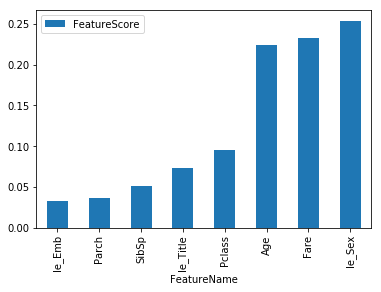

In [0]:
featureMatrixdf = pd.DataFrame({'FeatureName':featureNamesarr,'FeatureScore':clfRet.feature_importances_})
featureMatrixdf=featureMatrixdf.sort_values(by=['FeatureScore'])
featureMatrixdf.plot.bar('FeatureName','FeatureScore')

# The below plot shows the importance of the Features. It shows on the top of the list Features like 
# Fare,Age,Sex,Title,Pclass etc. 

In [0]:
# This article explores a few more of the feature selection techniques. As highlighted in the last article 
# Feature Selection is one of the most important areas in machine learning that guides a Data Scientist to include 
# the right feature set that gives the best result. In certain problems there is an inundation of features and 
# these technique comes very handy. 

# This univariate  feature selection  technique uses a chi square test to test the independence of the features. 
# chi2 is typically used against categorical data points. Scikit has a function SelectKBest through which one 
# can get the score of each feature, the higher the score more valuable the feature.

# Use the SelectKBest to run the chi square test
from sklearn.feature_selection import SelectKBest
import numpy as np

from sklearn.feature_selection import chi2

kBestSelector = SelectKBest(chi2, k='all')

xTrain_Features = kBestSelector.fit(xTrain,yTrain) 

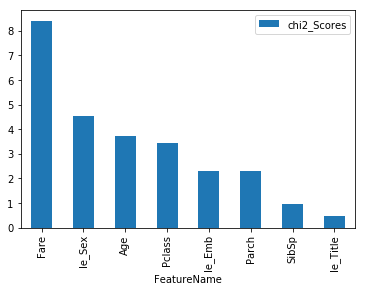

In [0]:
featureMatrixdf_chi2 = pd.DataFrame({'FeatureName':featureNamesarr,
                                     'chi2_pvalues':xTrain_Features.pvalues_,
                                     'chi2_Scores':np.log(xTrain_Features.scores_)})
featureMatrixdf_chi2_Sorted=featureMatrixdf_chi2.sort_values(by=['chi2_Scores'],ascending=False)
featureMatrixdf_chi2_Sorted[-featureMatrixdf_chi2_Sorted['chi2_Scores'].isnull()].plot.bar('FeatureName','chi2_Scores')

In [0]:
# Creating the random forest in the context of titanic using the randomforestclassifier.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,max_features ="auto")

rf.fit(xTrain, yTrain)
rf.feature_importances_

array([ 0.23555409,  0.25793719,  0.03317612,  0.083451  ,  0.05628243,
        0.03180597,  0.18772073,  0.11407248])

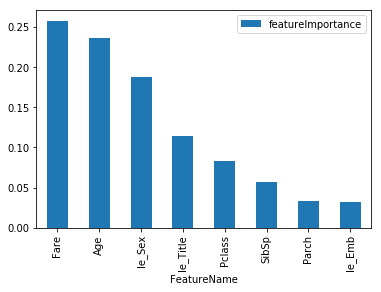

In [0]:
featureMatrixdf_randforest = pd.DataFrame({'FeatureName':featureNamesarr,'featureImportance':  list(map(lambda x: round(x, 4), rf.feature_importances_))})
featureMatrixdf_randforest=featureMatrixdf_randforest.sort_values(by=['featureImportance'],ascending=False)
featureMatrixdf_randforest.plot.bar('FeatureName','featureImportance')

In [0]:
# The following is another method of describing the importance of feature by permuting its value and 
# finding the corresponding effect on the metrics of the model. 
# In this method, the model is trained on all features and 
# each of its features is permuted one by one. At each iteration of permute the model performance is 
# measured and is compared against the original model. Features that are of no importance will likely have 
# no effect because of permute. This metric is not provided by default in scikit and hence programmed to calculate it

In [0]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import *
from collections import defaultdict

In [0]:
scores = defaultdict(list)

In [0]:
rs = ShuffleSplit(5,test_size =.3)

In [0]:
# for ShuffleSplit takes the entire dataset of 891 data point runs the iteration 20 times and in each iteration 
# it gives 30% of the data point as a test
for train_idx, test_idx in rs.split(xTrain):
    x_Train, x_Test = xTrain[train_idx], xTrain[test_idx]
    y_Train, y_Test = yTrain[train_idx], yTrain[test_idx]
    # The model is trained on the training dataset and the model performance is calculated using the f1_score
    r = rf.fit(x_Train, y_Train.ravel())
    f1Score = f1_score(y_Test, rf.predict(x_Test))
    print('F1 score %f'%(f1Score))
    # The below loop is repeated across each of the features in X and in each iteration  each of the feature 
    # values are randomly shuffled and the predict against the shuffled dataset. 
    # The model performance is measured against each features change.
    for i in range(xTrain.shape[1]):      
        x_TestCopy = x_Test.copy()
        np.random.shuffle(x_TestCopy[:, i])
        shuff_f1Score = f1_score(y_Test, rf.predict(x_TestCopy))
        scores[featureNamesarr[i]].append((f1Score-shuff_f1Score)/f1Score)
        # print('F1 score %f %f'%(f1Score,shuff_f1Score))

F1 score 0.770732
F1 score 0.703518
F1 score 0.794258
F1 score 0.794521
F1 score 0.757282


In [0]:
# At the end of the process, an array of features and its corresponding effect on the model is recorded.
# A mean of the effect across the features relays the importance of the feature
sorted([(round(np.mean(item),4),feat) for feat,item in scores.items()],reverse = True)

[(0.15609999999999999, 'le_Sex'),
 (0.081299999999999997, 'Pclass'),
 (0.076100000000000001, 'le_Title'),
 (0.071099999999999997, 'Age'),
 (0.045999999999999999, 'Fare'),
 (0.010500000000000001, 'Parch'),
 (0.0095999999999999992, 'SibSp'),
 (0.002, 'le_Emb')]

In [0]:
featureMatrixdf_rf_mda = pd.DataFrame(sorted([(round(np.mean(item),4),feat) for feat,item in scores.items()],reverse = True))

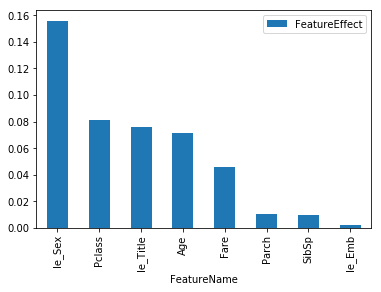

In [0]:
featureMatrixdf_rf_mda.columns = ['FeatureEffect','FeatureName']
featureMatrixdf_rf_mda.plot.bar('FeatureName','FeatureEffect')

In [0]:
featureNamesarr

array(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'le_Emb', 'le_Sex',
       'le_Title'], dtype=object)

In [0]:
trainDataExtSubsetdf_forLR = trainDataExtdf[["PassengerId", "Sex","Pclass","Age","SibSp","Parch","Fare","Embarked", "Title","Survived"]]

In [0]:
trainDataExtSubsetdf_forLR_havingDummies = pd.get_dummies(trainDataExtSubsetdf_forLR,columns = ['Sex','Embarked','Title','Pclass'])

In [0]:
trainDataExtSubsetdf_forLR_havingDummies.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Pclass_1,Pclass_2,Pclass_3
0,1,22.00000,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,5,35.00000,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,6,32.36809,0,0,8.4583,0,0,1,0,1,0,0,0,1,0,0,0,0,1
3,7,54.00000,0,0,51.8625,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,13,20.00000,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [0]:
trainDataExtSubsetdf_forLR_havingDummies.drop('Sex_female',axis=1,inplace = True)

In [0]:
trainDataExtSubsetdf_forLR_havingDummies.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Pclass_1,Pclass_2,Pclass_3
0,1,22.00000,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,1
1,5,35.00000,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,1
2,6,32.36809,0,0,8.4583,0,1,0,1,0,0,0,1,0,0,0,0,1
3,7,54.00000,0,0,51.8625,0,1,0,0,1,0,0,1,0,0,1,0,0
4,13,20.00000,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,1


In [0]:
# Lets create the dataset that will be used for determining feature importance.
featureNamesarr = trainDataExtSubsetdf_forLR_havingDummies.columns.difference(['PassengerId','Survived']).values
xTrain = trainDataExtSubsetdf_forLR_havingDummies[featureNamesarr].values
yTrain = trainDataExtSubsetdf_forLR_havingDummies["Survived"].values

In [0]:
featureNamesarr

array(['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Parch',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Others'], dtype=object)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
rs = ShuffleSplit(1,test_size =.3)
xTrainC = xTrain
for train_idx, test_idx in rs.split(xTrain):
    x_Train, x_Test = xTrainC[train_idx], xTrainC[test_idx]
    y_Train, y_Test = yTrain[train_idx], yTrain[test_idx]
    
    logisticReg_model = LogisticRegression()
    logisticReg_model.fit(x_Train, y_Train)
    acc_log = round(logisticReg_model.score(x_Train, y_Train) * 100, 2)
    print(acc_log)

84.27


In [0]:
coeff_df = pd.DataFrame(featureNamesarr)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logisticReg_model.coef_[0])

coeff_df =coeff_df.sort_values(by='Correlation', ascending=False)

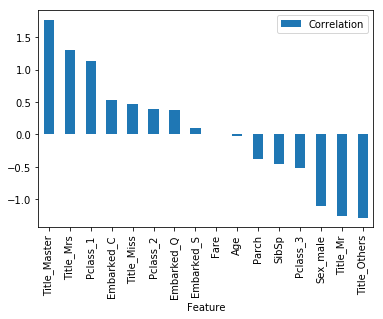

In [0]:
coeff_df.plot.bar("Feature","Correlation")

In [0]:
rs = ShuffleSplit(1,test_size =.3)
xTrainC = xTrain
for train_idx, test_idx in rs.split(xTrain):
    x_Train, x_Test = xTrainC[train_idx], xTrainC[test_idx]
    y_Train, y_Test = yTrain[train_idx], yTrain[test_idx]
    
    logisticReg_model = LogisticRegression()
    logisticReg_model.fit(x_Train, y_Train)
    f1Score = f1_score(y_Test, logisticReg_model.predict(x_Test))
    print('F1 score %f'%(f1Score))
    
    for loop in range(xTrain.shape[1]):
        print('Dropping feature %s'%(featureNamesarr[loop]))
        xTrainC = np.delete(xTrain,loop,axis = 1)
        x_Train, x_Test = xTrainC[train_idx], xTrainC[test_idx]
        y_Train, y_Test = yTrain[train_idx], yTrain[test_idx]

        logisticReg_model = LogisticRegression()
        logisticReg_model.fit(x_Train, y_Train)
        
        f1Score = f1_score(y_Test, logisticReg_model.predict(x_Test))
        print('F1 score %f'%(f1Score))

# steps to define an Age band
trainDataExtdf['AgeBand'] = pd.cut(trainDataExtdf['Age'], 5)

F1 score 0.723404
Dropping feature Age
F1 score 0.724324
Dropping feature Embarked_C
F1 score 0.724324
Dropping feature Embarked_Q
F1 score 0.716578
Dropping feature Embarked_S
F1 score 0.723404
Dropping feature Fare
F1 score 0.719577
Dropping feature Parch
F1 score 0.712766
Dropping feature Pclass_1
F1 score 0.724324
Dropping feature Pclass_2
F1 score 0.723404
Dropping feature Pclass_3
F1 score 0.727273
Dropping feature Sex_male
F1 score 0.716578
Dropping feature SibSp
F1 score 0.699454
Dropping feature Title_Master
F1 score 0.709677
Dropping feature Title_Miss
F1 score 0.720430
Dropping feature Title_Mr
F1 score 0.720430
Dropping feature Title_Mrs
F1 score 0.720430
Dropping feature Title_Others
F1 score 0.727273


In [0]:
trainDataExtdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,le_Sex,le_Title,le_Emb,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,1,2,2,"(16.336, 32.252]"
1,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,1,2,2,"(32.252, 48.168]"
2,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,Q,Mr,1,2,1,"(32.252, 48.168]"
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr,1,2,2,"(48.168, 64.084]"
4,13,0,3,"Saundercock, Mr. William Henry",male,20.00000,0,0,A/5. 2151,8.0500,S,Mr,1,2,2,"(16.336, 32.252]"


In [0]:
trainDataExtdf[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.392670
2,"(32.252, 48.168]",0.320000
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909
